<a href="https://colab.research.google.com/github/MTLSHUE/Stripe_Noise_Suppression/blob/master/Stripe_Noise_Suppresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2

Image = np.float32(cv2.imread('1.tif',-1))

# Гауссово размытие:
#ImageSmooth = cv2.GaussianBlur(Image,(0,0),1.5,1.5)
# Билатеральный фильтр:
ImageSmooth = cv2.bilateralFilter(Image, 9, 50, 50)

ImageCorr = np.copy(Image)
ImageCorr[ImageCorr==0] = 1

StartRaw = int(ImageCorr.shape[0]/2)
IterN = 4

# Идем из середины вниз:
for r in range(StartRaw, ImageCorr.shape[0]-1):
    # Итеративный подбор дельты для каждой пары соседних столбцов, приравн. медиану их отношения к 1:
    StepScale = 0.9
    Step = 0.
    ImageCorr[r,:] = ImageCorr[r,:]*np.median(ImageSmooth[r,:])/np.median(ImageCorr[r,:])
    for i in range(IterN):
        RawRatioMedian = np.median((ImageCorr[r+1,:] + Step)/ImageCorr[r,:])
        Step += (1 - RawRatioMedian)*np.median(ImageCorr[r+1,:])*StepScale
        StepScale = StepScale*0.9
    ImageCorr[r+1,:] += Step

# Идем из середины вверх:
for r in range(1, StartRaw)[::-1]:
    # Итеративный подбор дельты для каждой пары соседних столбцов, приравн. медиану их отношения к 1:
    StepScale = 0.9
    Step = 0.
    ImageCorr[r,:] = ImageCorr[r,:]*np.median(ImageSmooth[r,:])/np.median(ImageCorr[r,:])
    for i in range(IterN):
        RawRatioMedian = np.median((ImageCorr[r-1,:] + Step)/ImageCorr[r,:])
        Step += (1 - RawRatioMedian)*np.median(ImageCorr[r-1,:])*StepScale
        StepScale = StepScale*0.9
    ImageCorr[r-1,:] += Step

#cv2.imwrite('1_GaussBlur_Corr.tif', np.uint16(ImageCorr))
cv2.imwrite('1_BilatFilt_Corr.tif', np.uint16(ImageCorr))

True

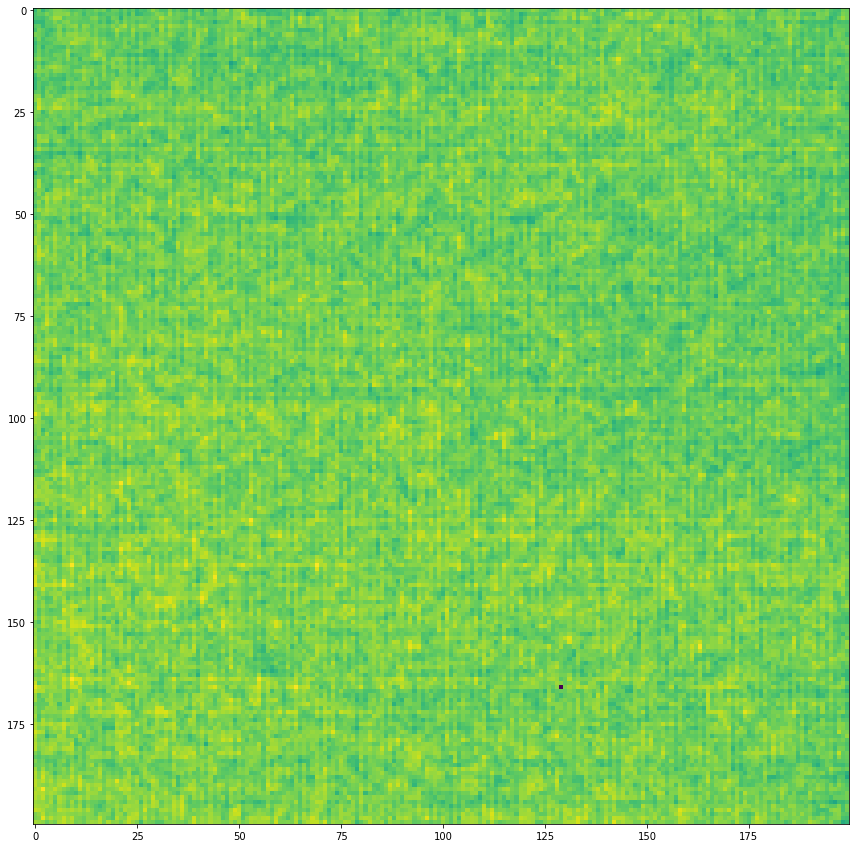

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.imshow(Image[2800:3000, 1100:1300])